In [7]:
from denoising.transformations.anscombe import *
from images.statistics import histogram
from images.visualization import show, show_images
from denoising.datasets import load_bsd300, extract_patches, load_dataset, add_noise

from settings import BSD300_DIR

import matplotlib.pyplot as plt
import numpy as np
import cv2

In [8]:
imgs = load_bsd300(BSD300_DIR)
patches = extract_patches(imgs, begin=(0,0), stride=10,
    dimension=(50,50), quantity_per_image=(5,2))

y_train, y_test = load_dataset(patches, shuffle=True, split=(80,20))

x_train = add_noise(y_train, noise='poisson')
x_test = add_noise(y_test, noise='poisson')


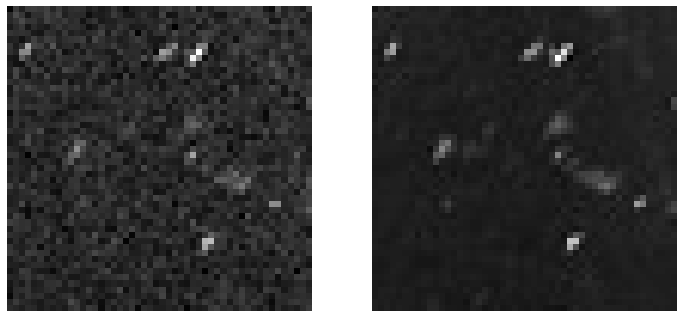

In [10]:
show_images(x_train[0], y_train[0])

In [13]:
def estatisticas(img):
    print('Média: %.2f, variância: %.2f, desvio padrão: %.2f, mínimo: %.2f e máximo: %.2f' % (img.mean(), np.var(img), img.std(), img.min(), img.max()))

In [16]:
estatisticas(anscombe(x_train[10]) - anscombe(y_train[10]))

Média: 0.01, variância: 1.00, desvio padrão: 1.00, mínimo: -3.53 e máximo: 3.47


In [41]:
from denoising.methods.traditional.bm3d import BM3D

In [48]:
pred = BM3D(anscombe(x_test), noise_std_dev=1.00)

In [58]:
from denoising.metrics import psnr, ssim
from denoising.utils import normalize

In [54]:
psnr(y_test, x_test).mean()

28.571090820532092

In [55]:
psnr(y_test, normalize(inverse_anscombe(pred), data_type='int')).mean()

23.136367302082082

In [59]:
ssim(y_test, x_test).mean()

0.6418471357900849

In [60]:
ssim(y_test, normalize(inverse_anscombe(pred), data_type='int')).mean()

0.8917654595217748

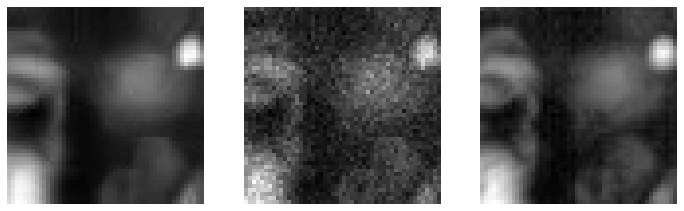

In [57]:
show_images(inverse_anscombe(pred)[10], x_test[10], y_test[10])